In [7]:
# %pip install seaborn

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Load the CSV file
df = pd.read_csv("your_file.csv")

# Convert commit timestamps (Assuming commits are in chronological order)
df["commit_index"] = range(len(df))

FileNotFoundError: [Errno 2] No such file or directory: 'your_file.csv'

In [41]:
def plot_vulnerability_trends(df, csv_file, title):
    # Ensure commit order is preserved
    df["commit_index"] = range(len(df))

    # Create side-by-side subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

    # Plot vulnerability trends over commits
    axes[0].plot(df["commit_index"], df["high_sev"], label="High Severity", marker="o", linestyle="-", color="red")
    axes[0].plot(df["commit_index"], df["med_sev"], label="Medium Severity", marker="s", linestyle="--", color="orange")
    axes[0].plot(df["commit_index"], df["low_sev"], label="Low Severity", marker="^", linestyle=":", color="green")
    axes[0].set_xlabel("Commit Index (Chronological Order)")
    axes[0].set_ylabel("Number of Vulnerabilities")
    axes[0].set_title(f"Vulnerability Trends Over Time - {title}")
    axes[0].legend()
    axes[0].grid()

    # Plot elimination rates
    axes[1].plot(df["commit_index"], -df["resolved_high"], label="High Severity Eliminated", linestyle="--", color="red")
    axes[1].plot(df["commit_index"], -df["resolved_med"], label="Medium Severity Eliminated", linestyle="--", color="orange")
    axes[1].plot(df["commit_index"], -df["resolved_low"], label="Low Severity Eliminated", linestyle="--", color="green")
    axes[1].set_xlabel("Commit Index")
    axes[1].set_ylabel("Number of Resolved Vulnerabilities")
    axes[1].set_title(f"Vulnerability Resolution Trends - {title}")
    axes[1].legend()
    axes[1].grid()

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()

In [46]:
def analyze_vulnerabilities(csv_file, title):
    # Load the CSV file
    df = pd.read_csv(csv_file)

    # Compute resolution rates
    df["resolved_high"] = df["high_sev"].diff().fillna(0)
    df["resolved_med"] = df["med_sev"].diff().fillna(0)
    df["resolved_low"] = df["low_sev"].diff().fillna(0)

    # Summarizing introduction vs elimination
    intro_elim_summary = {
        "Severity Level": ["High", "Medium", "Low"],
        "Introduced (Total)": [df["high_sev"].sum(), df["med_sev"].sum(), df["low_sev"].sum()],
        "Eliminated (Total)": [-df["resolved_high"][df["resolved_high"] < 0].sum(),
                               -df["resolved_med"][df["resolved_med"] < 0].sum(),
                               -df["resolved_low"][df["resolved_low"] < 0].sum()]
    }
    summary_df = pd.DataFrame(intro_elim_summary)
    print(f"\nIntroduction vs. Elimination Summary for {title}:\n", summary_df)

    # Statistical analysis of severity-level fixes
    avg_fix_time_high = df[df["resolved_high"] < 0].index.to_series().diff().mean()
    avg_fix_time_med = df[df["resolved_med"] < 0].index.to_series().diff().mean()
    avg_fix_time_low = df[df["resolved_low"] < 0].index.to_series().diff().mean()

    print(f"\nAverage Fix Time for High Severity in {title}: {avg_fix_time_high} commits")
    print(f"Average Fix Time for Medium Severity in {title}: {avg_fix_time_med} commits")
    print(f"Average Fix Time for Low Severity in {title}: {avg_fix_time_low} commits")

    # Call the plotting function
    plot_vulnerability_trends(df, csv_file, title)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_vulnerability_trends(df, title):
    df["commit_index"] = range(len(df))
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot vulnerability trends
    axes[0].plot(df["commit_index"], df["high_sev"], label="High Severity", marker="o", linestyle="-", color="red")
    axes[0].plot(df["commit_index"], df["med_sev"], label="Medium Severity", marker="s", linestyle="--", color="orange")
    axes[0].plot(df["commit_index"], df["low_sev"], label="Low Severity", marker="^", linestyle=":", color="green")
    axes[0].set_xlabel("Commit Index (Chronological Order)")
    axes[0].set_ylabel("Number of Vulnerabilities")
    axes[0].set_title(f"Vulnerability Trends Over Time - {title}")
    axes[0].legend()
    axes[0].grid()
    
    # Plot resolution trends (positive values for resolved vulnerabilities)
    axes[1].plot(df["commit_index"], df["resolved_high"], label="High Severity Eliminated", linestyle="--", color="red")
    axes[1].plot(df["commit_index"], df["resolved_med"], label="Medium Severity Eliminated", linestyle="--", color="orange")
    axes[1].plot(df["commit_index"], df["resolved_low"], label="Low Severity Eliminated", linestyle="--", color="green")
    axes[1].set_xlabel("Commit Index")
    axes[1].set_ylabel("Number of Resolved Vulnerabilities")
    axes[1].set_title(f"Vulnerability Resolution Trends - {title}")
    axes[1].legend()
    axes[1].grid()
    
    plt.tight_layout()
    plt.show()

def analyze_vulnerabilities(csv_file, title):
    df = pd.read_csv(csv_file)
    
    # Compute resolved vulnerabilities as only the negative diffs (vulnerability decrease)
    df["resolved_high"] = -df["high_sev"].diff().fillna(0).clip(upper=0)
    df["resolved_med"] = -df["med_sev"].diff().fillna(0).clip(upper=0)
    df["resolved_low"] = -df["low_sev"].diff().fillna(0).clip(upper=0)
    
    # Summarizing introduction vs elimination
    intro_elim_summary = {
        "Severity Level": ["High", "Medium", "Low"],
        "Introduced (Total)": [df["high_sev"].sum(), df["med_sev"].sum(), df["low_sev"].sum()],
        "Eliminated (Total)": [df["resolved_high"].sum(), df["resolved_med"].sum(), df["resolved_low"].sum()]
    }
    summary_df = pd.DataFrame(intro_elim_summary)
    print(f"\nIntroduction vs. Elimination Summary for {title}:\n", summary_df)
    
    # Compute average fix time
    avg_fix_time_high = df[df["resolved_high"] > 0].index.to_series().diff().mean()
    avg_fix_time_med = df[df["resolved_med"] > 0].index.to_series().diff().mean()
    avg_fix_time_low = df[df["resolved_low"] > 0].index.to_series().diff().mean()
    
    print(f"\nAverage Fix Time for High Severity in {title}: {avg_fix_time_high} commits")
    print(f"Average Fix Time for Medium Severity in {title}: {avg_fix_time_med} commits")
    print(f"Average Fix Time for Low Severity in {title}: {avg_fix_time_low} commits")
    
    plot_vulnerability_trends(df, title)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\bhanu\AppData\Local\Temp\ipykernel_21092\3986544339.py:1: SyntaxWarning: invalid escape sequence '\A'
  analyze_vulnerabilities("individual_repository_level_analysis\ArchieveBox_bandit_summary.csv", "ArchieveBox")



Introduction vs. Elimination Summary for ArchieveBox:
   Severity Level  Introduced (Total)  Eliminated (Total)
0           High                9723                56.0
1         Medium               40673                41.0
2            Low              501880               477.0

Average Fix Time for High Severity in ArchieveBox: 3.1666666666666665 commits
Average Fix Time for Medium Severity in ArchieveBox: 3.357142857142857 commits
Average Fix Time for Low Severity in ArchieveBox: 2.2093023255813953 commits


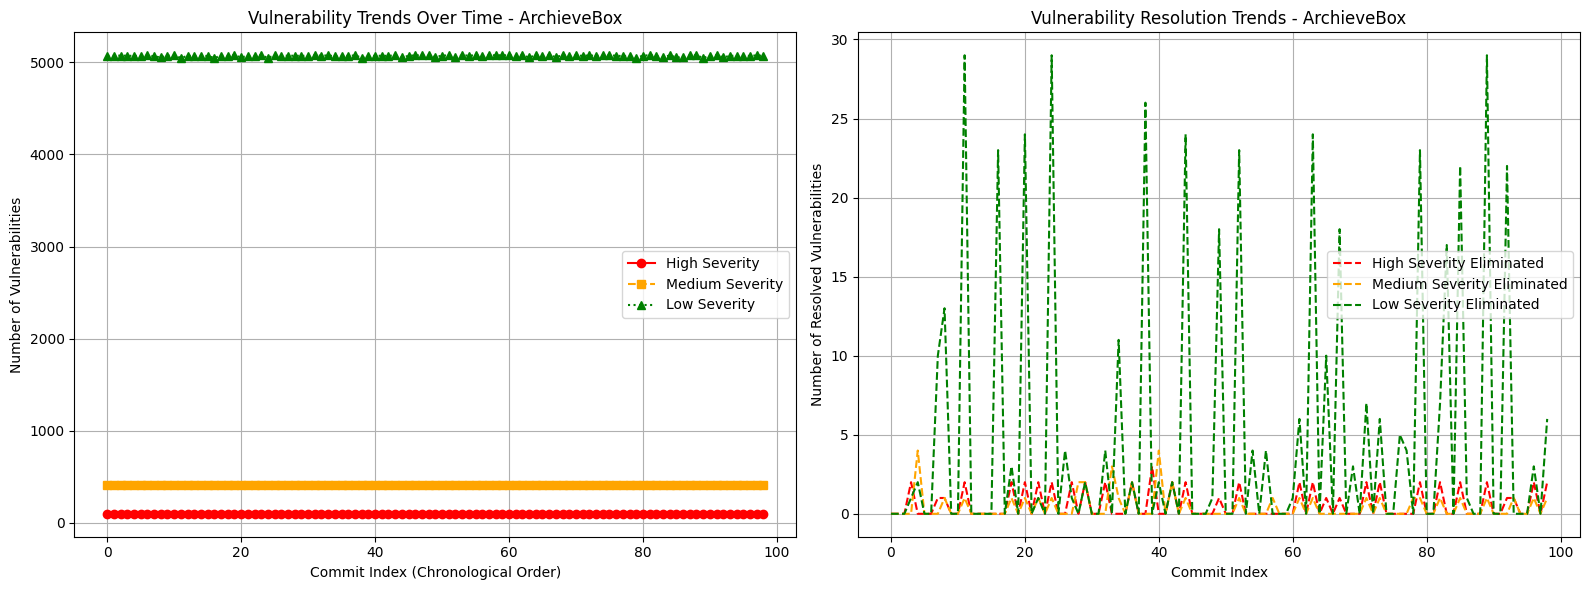

In [2]:
analyze_vulnerabilities("individual_repository_level_analysis\ArchieveBox_bandit_summary.csv", "ArchieveBox")


Introduction vs. Elimination Summary for Hosts:
   Severity Level  Introduced (Total)  Eliminated (Total)
0           High                2178                -0.0
1         Medium                3861                -0.0
2            Low               61479                -0.0

Average Fix Time for High Severity in Hosts: nan commits
Average Fix Time for Medium Severity in Hosts: nan commits
Average Fix Time for Low Severity in Hosts: nan commits


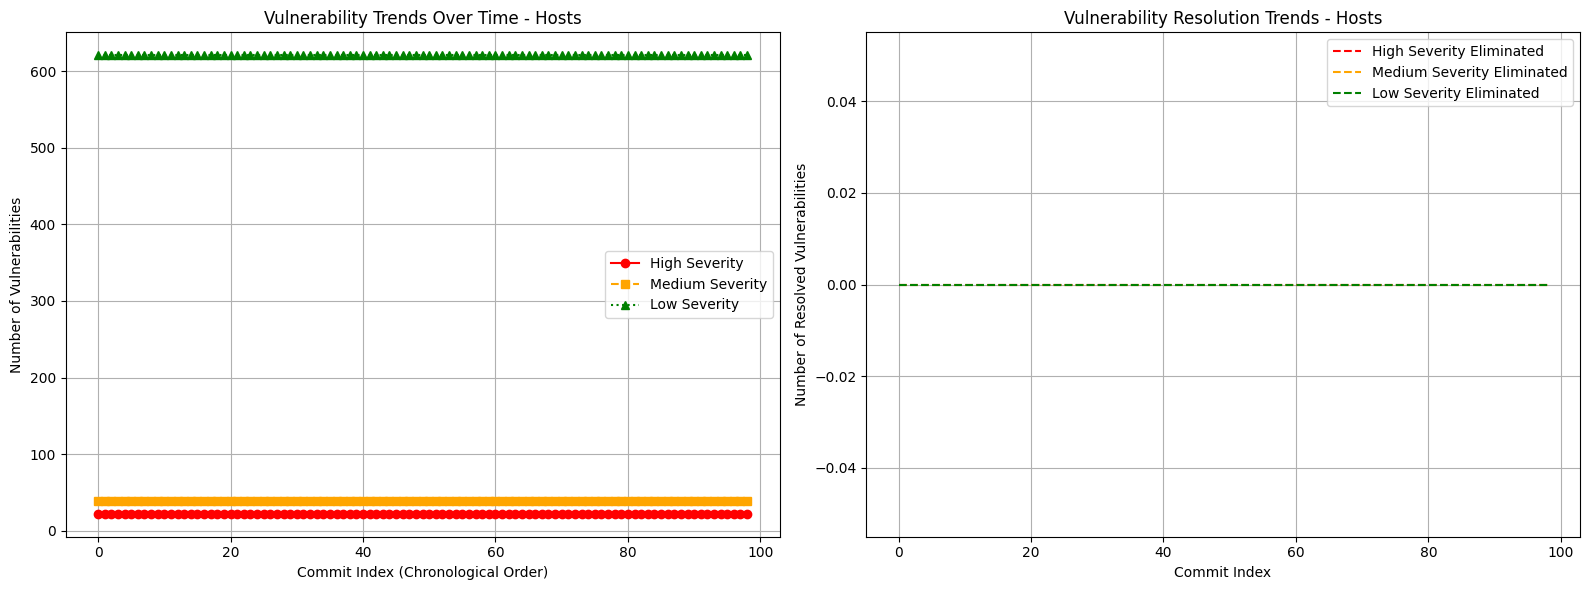

In [48]:
analyze_vulnerabilities("individual_repository_level_analysis/hosts_bandit_summary.csv", "Hosts")

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\bhanu\AppData\Local\Temp\ipykernel_27132\3900142590.py:1: SyntaxWarning: invalid escape sequence '\p'
  analyze_vulnerabilities( "individual_repository_level_analysis\pwntools_bandit_summary.csv","Pwntools")



Introduction vs. Elimination Summary for Pwntools:
   Severity Level  Introduced (Total)  Eliminated (Total)
0           High                4356                -0.0
1         Medium               13656                 6.0
2            Low              274682               297.0

Average Fix Time for High Severity in Pwntools: nan commits
Average Fix Time for Medium Severity in Pwntools: 45.0 commits
Average Fix Time for Low Severity in Pwntools: 2.375 commits


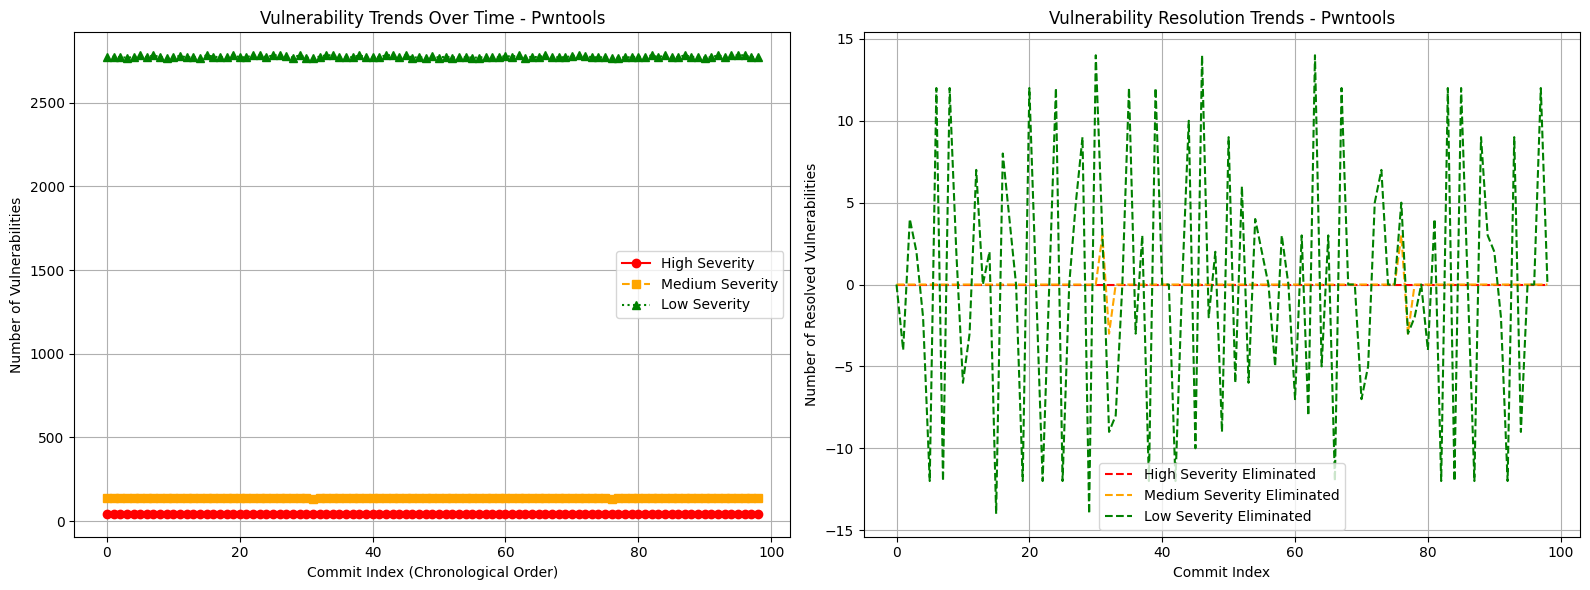

In [ ]:
analyze_vulnerabilities( "individual_repository_level_analysis\pwntools_bandit_summary.csv","Pwntools")